In [27]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


In [28]:
def matcher(descriptor_1, descriptor_2):
    matches = []
    for query_id, query_value in enumerate(descriptor_1):
        for train_id, train_value in enumerate(descriptor_2):
            matches.append(cv2.DMatch(
                                      _distance=int(np.linalg.norm(query_value-train_value)),
                                      _queryIdx=query_id,
                                      _trainIdx=train_id
                                      )
                          )
    return matches

In [29]:


image_1 = cv2.cvtColor(cv2.imread('image_1.png'), cv2.COLOR_BGR2GRAY)
image_2 = cv2.cvtColor(cv2.imread('image_2.png'), cv2.COLOR_BGR2GRAY)

key_points_1, descriptor_1 = cv2.SIFT_create().detectAndCompute(image_1, None)
key_points_2, descriptor_2 = cv2.SIFT_create().detectAndCompute(image_2, None)




[ WARN:0@961.829] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('image_1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


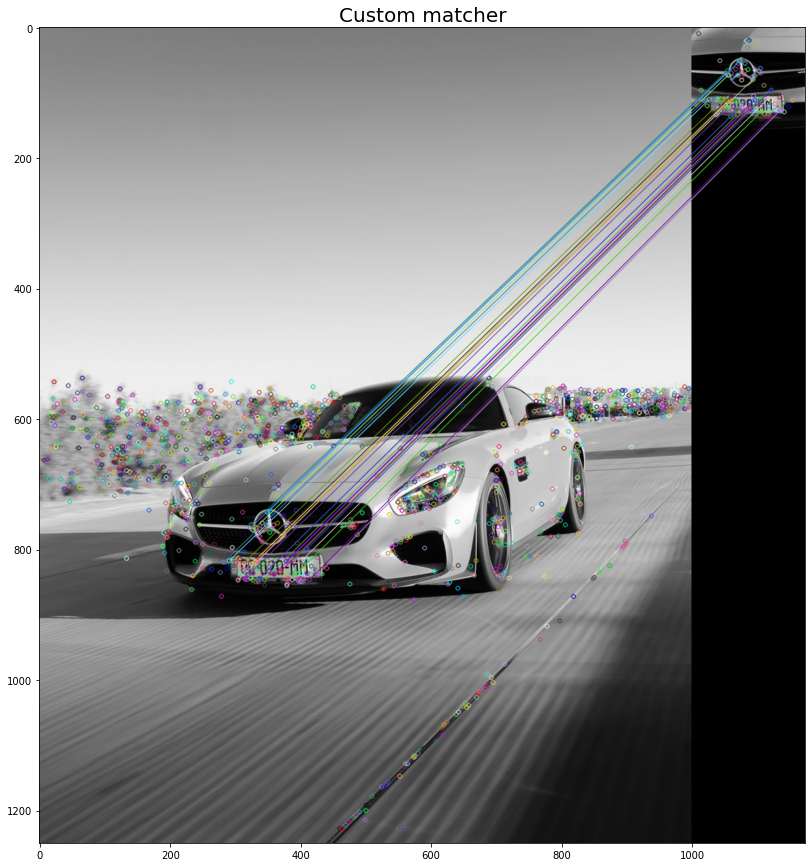

(<matplotlib.image.AxesImage at 0x7f97ab99c250>, None)

In [ ]:
plt.figure(figsize=(25,15))
matches = sorted(matcher(descriptor_1, descriptor_2), key = lambda x: x.distance)[:30]

match_img = cv2.drawMatches(image_1, key_points_1, image_2, key_points_2, matches, None)
    
plt.title('Custom matcher', fontsize=20)
plt.imshow(match_img), plt.show()

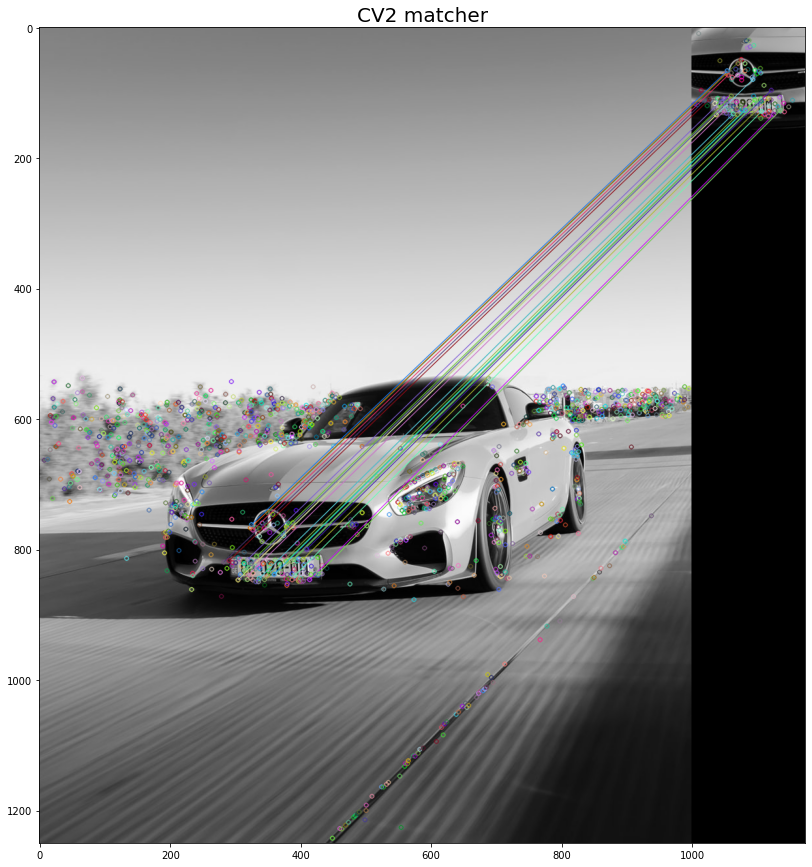

(<matplotlib.image.AxesImage at 0x7f97ab9fea90>, None)

In [ ]:
plt.figure(figsize=(25,15))
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = sorted(bf.match(descriptor_1, descriptor_2), key = lambda x: x.distance)[:30]

match_img = cv2.drawMatches(image_1, key_points_1, image_2, key_points_2, matches, None)
    
plt.title('CV2 matcher', fontsize=20)
plt.imshow(match_img), plt.show()